In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC #support vector classification
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [6]:
wine = pd.read_csv('winequality-red.csv')

In [7]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
fixed acidity           1596 non-null float64
volatile acidity        1596 non-null float64
citric acid             1596 non-null float64
residual sugar          1596 non-null float64
chlorides               1596 non-null float64
free sulfur dioxide     1596 non-null float64
total sulfur dioxide    1596 non-null float64
density                 1596 non-null float64
pH                      1596 non-null float64
sulphates               1596 non-null float64
alcohol                 1596 non-null float64
quality                 1596 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.7 KB


In [9]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
#pre-process data
bins = (2, 6.5, 8) #2 bins
group_names = ['bad', 'good']

#cut means we cut out wine quality and replace it 
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

In [12]:
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [14]:
label_quality = LabelEncoder() # sklearn import 
#fit_transform - calcs means and fits in missing values
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [16]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [17]:
wine['quality'].value_counts()

0    1379
1     217
Name: quality, dtype: int64

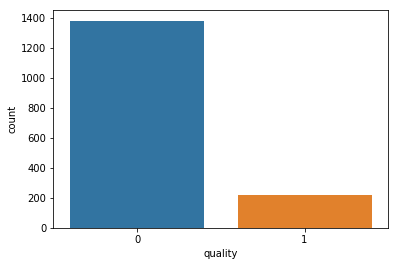

In [18]:
sns.countplot(wine['quality']) #seaborn sits on matplotlib with extrea features

In [19]:
#separate dataset as response variable and feature variables
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [20]:
#train and test data split - 20% with random selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
#apply standard scaling to get optimised result
#level playing field for all variables
sc = StandardScaler()

#apply to train and test
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
X_train[:5]

array([[-1.2684328 , -1.15992969, -0.11655257, -0.17133997, -0.34841935,
         0.68159604,  0.33265733, -0.21047789,  0.70530984,  1.86378152,
         0.16814376],
       [ 0.16241717, -1.10356109,  0.65696208,  0.04451963, -0.10216977,
         0.00360553,  0.63314632,  0.57843659, -0.07014103, -1.07728849,
        -0.9625621 ],
       [ 1.82220314, -1.18811399,  1.37890909, -0.31524637, -0.08164897,
        -1.06180814, -0.95944535,  1.04437265, -2.13801003,  0.24319193,
        -1.15101307],
       [ 1.87943714, -0.28621642,  0.65696208, -0.81891878,  0.06199661,
        -0.96495235, -0.56880965,  0.1654478 , -1.55642187, -0.05691726,
        -0.36580068],
       [ 0.33411917, -0.25803212,  1.32734145,  1.05186445,  0.26720459,
        -1.25551972, -1.10968984, -0.4593301 , -0.65172919, -0.41704828,
         1.58152608]])

## Random Forest Classifier

In [29]:
#how many trees per forest - start high 
rf = RandomForestClassifier(n_estimators = 200) 
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

In [34]:
pred_rf[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1])

In [36]:
#check model performance
print(classification_report(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       277
           1       0.70      0.33      0.44        43

    accuracy                           0.89       320
   macro avg       0.80      0.65      0.69       320
weighted avg       0.88      0.89      0.87       320

[[271   6]
 [ 29  14]]


## SVM Classifier

In [37]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [38]:
#check model performance
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       277
           1       0.73      0.26      0.38        43

    accuracy                           0.89       320
   macro avg       0.81      0.62      0.66       320
weighted avg       0.87      0.89      0.86       320

[[273   4]
 [ 32  11]]


Here, it seems the SVM classifier is performing slightly better than the Random Forest model. 

SVM works better on smaller numbers.

## Neural Network

In [42]:
#multi layered perceptron classifier
# hidden layers, 3 layers of 11 each - 11 features coming in, 3 hidden layers
# max iterations default is 200, the more layers the more iterations needed 
mlpc = MLPClassifier(hidden_layer_sizes = (11, 11, 11), max_iter = 600)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [43]:
#check model performance
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       277
           1       0.68      0.53      0.60        43

    accuracy                           0.90       320
   macro avg       0.80      0.75      0.77       320
weighted avg       0.90      0.90      0.90       320

[[266  11]
 [ 20  23]]


In [49]:
#best performing model accuracy
#random forest
from sklearn.metrics import accuracy_score

cm = accuracy_score(y_test, pred_rf)
cm

0.890625